# Matplotlib環境中文化

In [10]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2024-12-29 08:08:38--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.15.238, 2607:f8b0:4025:802::200e
Connecting to drive.google.com (drive.google.com)|172.217.15.238|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-12-29 08:08:38--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.7.33, 2607:f8b0:4025:811::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.7.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  83.5MB/s    in 0.2s    

2024-12-29 08:08:41 (83.5 MB/s

# 進行翻譯，生成各層注意力矩陣

In [11]:
import matplotlib.pyplot as plt
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# 載入預訓練的翻譯模型
model_name = "Helsinki-NLP/opus-mt-zh-en"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# 定義中文輸入句子
input_text = "我喜歡機器學習，因為它十分迷人。"

# 將輸入句子進行編碼
inputs = tokenizer(input_text, return_tensors="pt")

# 提取注意力矩陣
with torch.no_grad():
    encoder_outputs = model.model.encoder(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        output_attentions=True,
        return_dict=True
    )
    attentions = encoder_outputs.attentions  # 提取編碼器的注意力矩陣

# 使用 generate 方法生成翻譯結果
outputs = model.generate(**inputs)
translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("翻譯結果:", translated_text)

# 獲取 Source Tokens
source_tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

翻譯結果: I like machine learning because it's fascinating.


# 繪製各層的多頭注意力矩陣

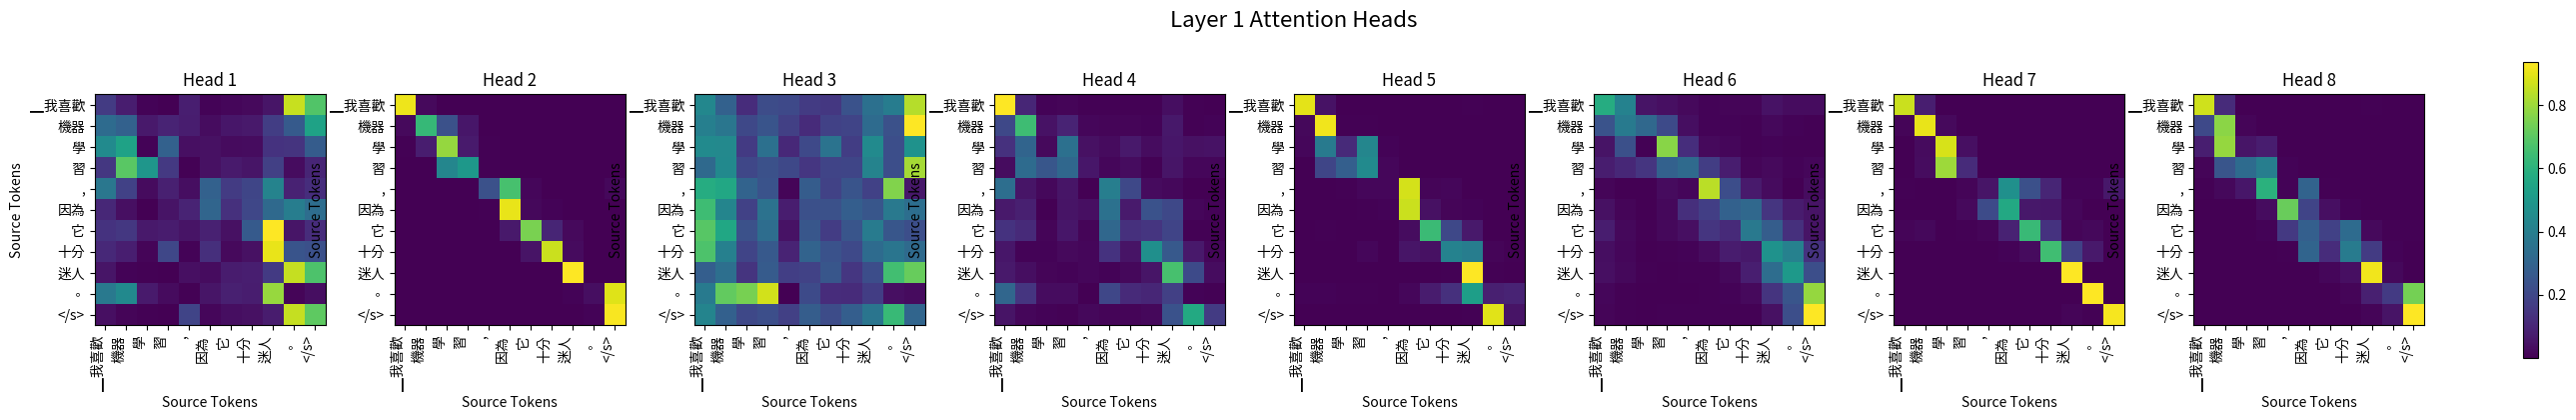

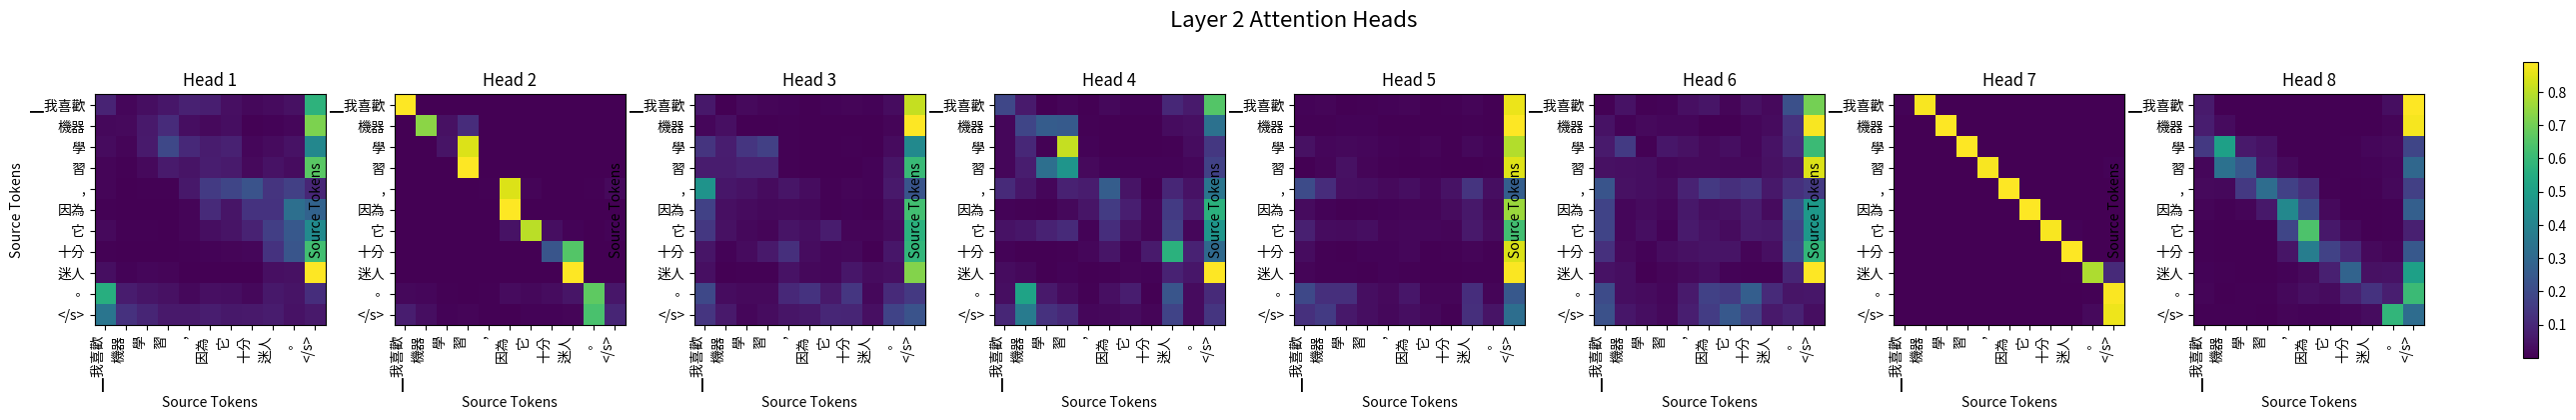

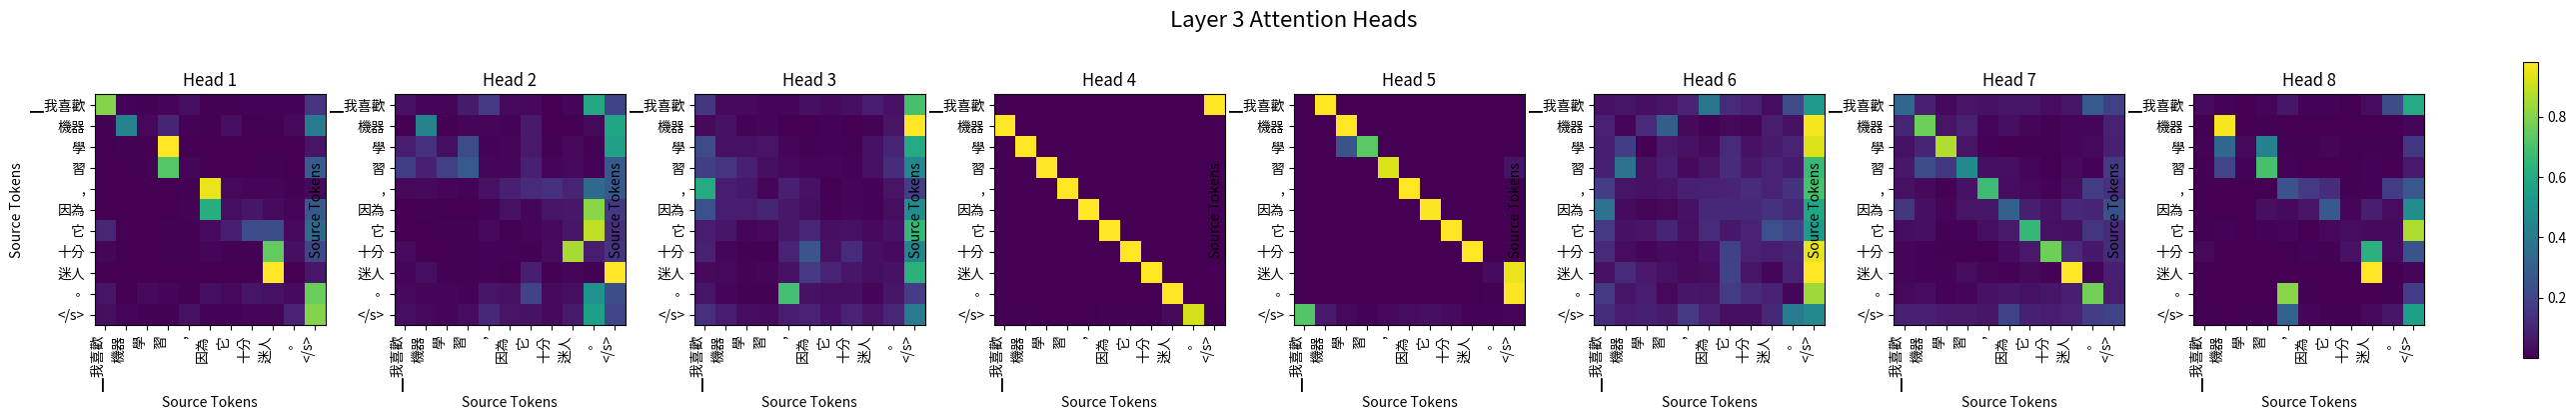

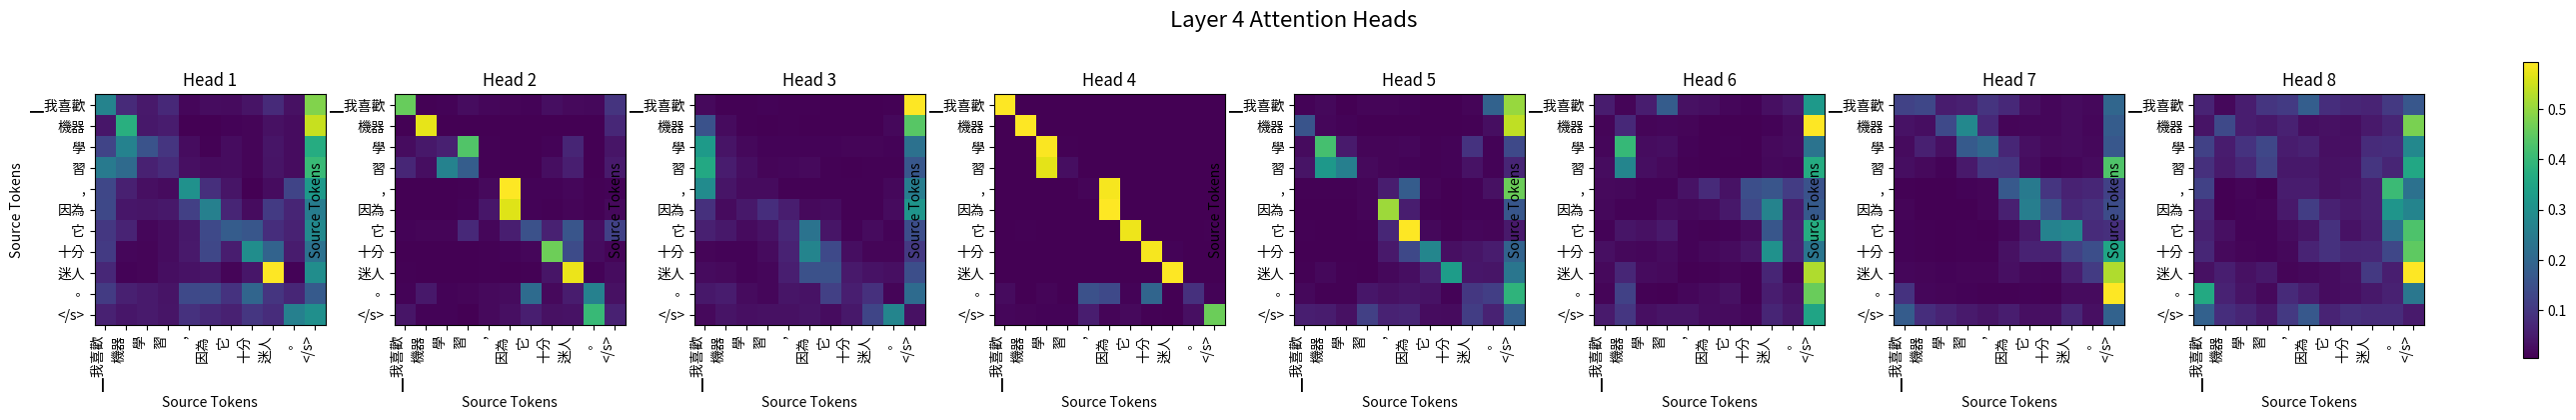

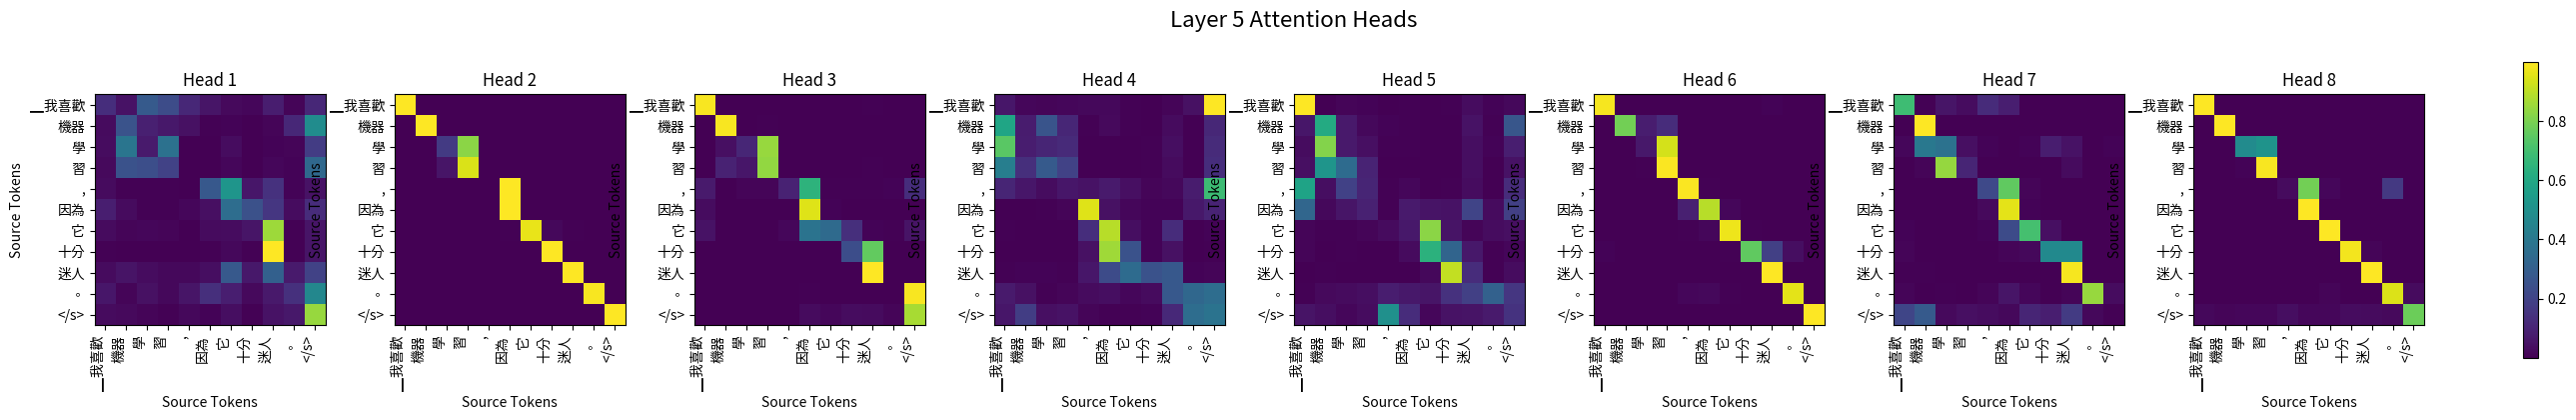

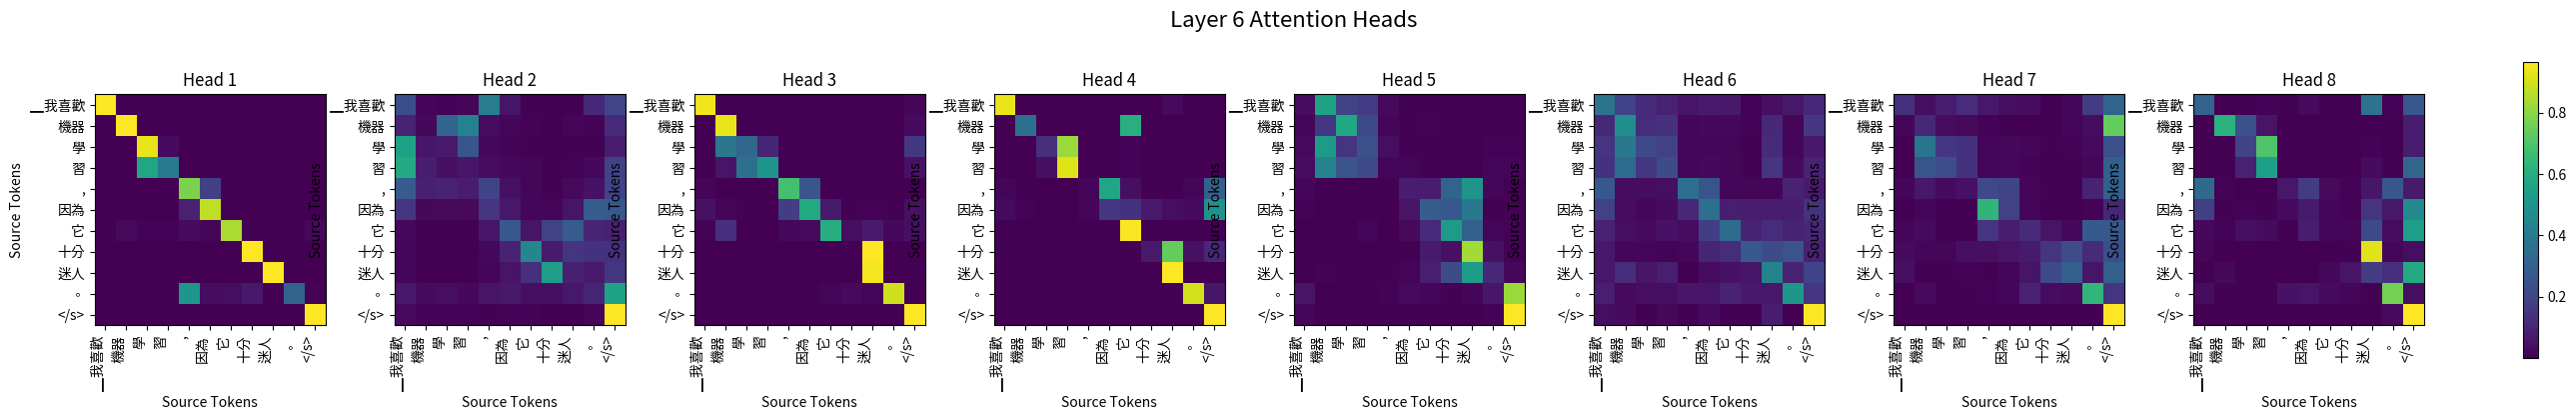

In [12]:
# 獲取每層的所有注意力頭的注意力矩陣
for layer_idx, layer_attention in enumerate(attentions):
    num_heads = layer_attention.shape[1]
    fig, axes = plt.subplots(1, num_heads, figsize=(num_heads * 4, 4))
    fig.suptitle(f"Layer {layer_idx + 1} Attention Heads", fontsize=16)

    for head_idx in range(num_heads):
        head_attention = layer_attention[0, head_idx].cpu().numpy()
        ax = axes[head_idx] if num_heads > 1 else axes
        im = ax.imshow(head_attention, cmap="viridis")
        ax.set_title(f"Head {head_idx + 1}")
        ax.set_xticks(range(len(source_tokens)))
        ax.set_xticklabels(source_tokens, rotation=90, ha="right")
        ax.set_yticks(range(len(source_tokens)))
        ax.set_yticklabels(source_tokens)
        ax.set_xlabel("Source Tokens")
        ax.set_ylabel("Source Tokens")

    # 替代 plt.tight_layout
    fig.subplots_adjust(wspace=0.3, hspace=0.4, top=0.85)
    cbar = fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
    plt.show()
